**Bocheng Dai, Chen Cao, Yifan Geng**

**bd367687@stanford.edu, chencao@stanford.edu, yifangen@stanford.edu**

# Introduction {-}

Welcome to MS&E 244: Statistical Arbitrage - Homework 2.

This assignment is due by January 27th, 2026 at 11:59pm Pacific Time and should be done in groups of 2-3 people. We recommend collaborating via a private GitHub repo.

Instructions for this assignment are below. **Please read all instructions carefully.**

1. Replace "Your Name(s) Here" above in bold with your name, and, if working in a group, your group members' names.
2. Read and run the instructions code in the Setup section. Make sure you understand what it does.
3. Answer the questions in the sections below. Make sure to limit code output to a reasonable length so that the resulting PDF you'll make from this notebook is readable. If the resulting PDF is not readable, keep your lines of code less than 80 characters.
4. Once finished, export or convert the notebook to PDF, using any method you like. For example, you can use the File -> Save and Export Notebook As -> PDF option in Jupyter Lab, you can use the [nbconvert](https://nbconvert.readthedocs.io/en/latest/) command line tool, etc. Whatever displays best is fine. Make sure no code is cut off in the PDF and that sheets are 8.5x11 inch dimensions or similar.
5. Submit the resulting PDF to the Gradescope assignment. If working in a group, only one person needs to submit and select all group members on Gradescope.
6. Zip and submit all files (your .ipynb file and any .py files we provided or you created) to the Canvas assignment. If working in a group, only one member of the group needs to submit to Canvas. Unlike Gradescope, no group members need to be selected on Canvas.

# Setup  {-}

**System Requirements**

First, ensure you have the proper system requirements:

1. We will only support Mac or Linux in this course. If you're on Windows, learn to use [WSL 2.0](https://learn.microsoft.com/en-us/windows/wsl/install) to run Linux on Windows, and then run these commands via WSL.
2. Ensure you have Python 3.10 and pip installed. You also need something to run this Jupyter notebook, whether that's Jupyter Notebook, Jupyter Lab, an IDE like VS Code, or Google Colab. We recommend collaborating via GitHub and using Jupyter Lab or VS Code to complete this notebook. 

**Jupyter Lab**

To use Jupyter Lab, we'll need to set up the Python virtual environment and install the requirements. We've provided example instructions for doing so below for those using Jupyter Lab. Note that you may need to substitute `pip` with `pip3` depending on your installation. You can learn more by reading the [venv docs](https://docs.python.org/3/library/venv.html) and the [ipykernel docs](https://ipython.readthedocs.io/en/stable/install/kernel_install.html). See documentation for [Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/) if needed.

```bash
# Navigate to the root directory containing your course files
cd /path/to/mse244

# Place the requirements.txt file in this directory if it isn't already there
# Put this .ipynb file in this directory or in a subdirectory, e.g. "hw1"

# Create a virtual environment
python3.10 -m venv .venv

# Activate the virtual environment
source .venv/bin/activate

# Install the required packages
pip install -r requirements.txt

# Add the virtual environment to Jupyter
python -m ipykernel install --user --name mse244 --display-name="MSE244"

# Start Jupyter Lab
jupyter lab

# Once in Jupyter, make sure to select the "MSE244" kernel 
```

**VS Code**

If using VS Code, read the docs for [Jupyter notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) and [virtual environments in VS Code](https://code.visualstudio.com/docs/python/environments). VS Code can help you create and activate a virtual environment and Jupyter kernel for this notebook through its GUI (though you should also learn how to do these things via the command line). Make sure that you use Python 3.10 to create your virtual environment.


Once setup is complete and you're running within your environment, you can begin executing the cells below.

# Imports {-}

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
from datetime import datetime
from typing import Any, Dict, Optional, Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

# We add any local imports (Python files we've written) here
from backtest import (
    load_data,
    plot_asset_with_max_return,
    select_asset_universe,
    form_pairs,
    estimate_hedge_ratio,
    compute_signal,
    allocate_positions,
    run_backtest,
)


# Configure pandas display options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 4)

# Data {-}

To start with, we'll load the supplied Japanese equity data, preprocess the data, and set up the necessary variables.

Please make sure to look up and learn about any lines you don't understand by reading the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html). This is essential knowledge for anyone working with financial data in Python.


Price df shape at load: (4235, 226)
Price df shape after slicing time axis: (2703, 226)
Price df shape after removing future asset columns: (2703, 222)

Prices head:


,1332.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1925.T,1928.T,...,9503.T,9531.T,9532.T,9602.T,9613.T,9735.T,9766.T,9843.T,9983.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-04,514.1772,1640.3337,906.6639,1236.6694,523.9589,456.3690,1560.3464,682.8918,1352.8394,1015.7311,...,2240.7510,2253.5034,1583.7520,1837.3094,946.7017,4466.2446,2745.0986,2307.3474,3180.9983,1098.4468
2007-01-05,535.0902,1598.5864,909.3971,1226.7228,513.8568,450.3043,1542.5345,677.7186,1339.8625,1005.1937,...,2172.8496,2222.2046,1548.7904,1841.5720,956.0132,4409.3506,2601.4155,2232.3472,3203.0117,1120.9558
2007-01-09,524.2733,1614.2418,925.7949,1256.5621,520.5914,460.9175,1538.9718,695.8253,1372.3043,1015.7311,...,2179.6396,2194.3833,1611.7211,1858.6237,977.7407,4508.9165,2586.2905,2214.6997,3167.2395,1114.2031
2007-01-10,506.2446,1581.1916,913.4961,1246.6157,511.8364,466.2240,1535.4095,691.9454,1356.0836,1006.3643,...,2138.8989,2159.6069,1566.2709,1841.5720,957.5651,4430.6855,2510.6685,2342.6404,3101.1982,1118.7048
2007-01-11,504.0811,1589.8885,910.7634,1249.9312,511.8364,479.8697,1567.4717,699.7054,1330.1299,1010.4626,...,2138.8989,2145.6963,1569.7675,1854.3606,945.1494,4380.9028,2525.7932,2347.0520,3057.1704,1118.7048



Metadata head:


Ticker,Industry,Sector,Company
1332.T,Fishery,Consumer Goods,NISSUI.CORP.
1605.T,Mining,Materials,INPEX.CORP.
1721.T,Construction,Capital Goods/Others,COMSYS.HOLDINGS.CORP.
1801.T,Construction,Capital Goods/Others,TAISEI.CORP.
1802.T,Construction,Capital Goods/Others,OBAYASHI.CORP.


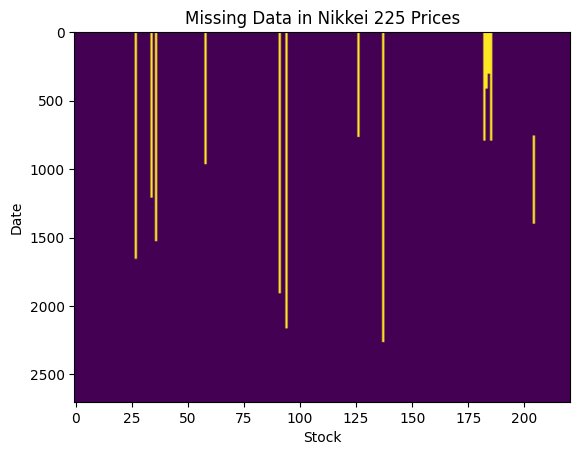

In [2]:
config = {
    'NIKKEI_CSV_PATH': 'N225.csv'
}

prices, returns, tickers, metadata = load_data(config, verbose=True)

# Question 1

(2 points)

First, let's look into some issues with the data. Some of you may have noticed in the last homework that there were a few strange returns or prices. Although we won't grade based on this, these were intentionally left in to sharpen your data cleaning skills. If you noticed them, congrats! Now we will explore these issues and learn about what to do with them.

Below, we've written code to do just that. Take a look at the function called `plot_asset_with_max_return`, which is specified in the `backtest.py` file. Try running the function to plot the largest returns in the dataset. Study the output of the function (i.e. the plot) for `max_rank` in {0, 1, 2, 3} to see the different assets with the largest returns. (Note that we won't study or attempt to change anything past max_rank=3 for the purposes of this class--feel free to explore, though)

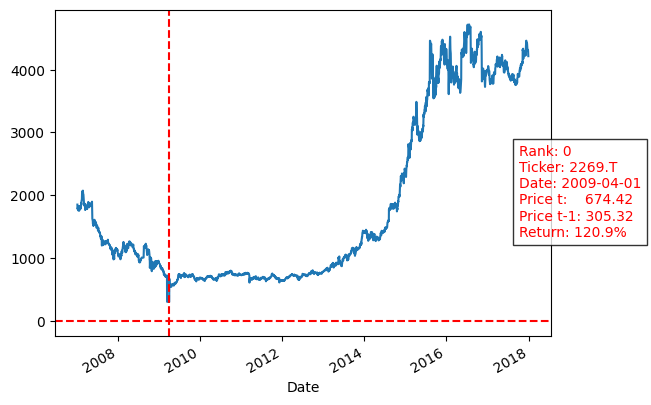

In [3]:
plot_asset_with_max_return(returns, prices, max_rank=0)

There may be some issues. Let's look into them.

## Part 1

Let's investigate 2269.T, which has the top rank (0). What's going on here? Use the `metadata` and the internet (generative AI ok here--but check the sources!) to find out what's going on. What do you think this price difference might be due to?

In [ ]:
# Your code here

**Your answer here:**

## Part 2

Now let's investigate 9201.T, which has the second and third-highest return. Again, use the metadata and the internet to find out what the price difference (and delisting) might be due to.

In [ ]:
# Your code here

**Your answer here:**

## Part 3

Finally, let's investigate 7974.T, which has the third-highest return. Again, find out what might've caused this price difference. Is it different from the others?

In [ ]:
# Your code here

**Your answer here:**

# Question 2

(4 points)

Objectively, the best way to deal with erroneous data is to correct it. However, we don't have the ability to do that. The data might have come from an old vendor, a non-responsive government agency, or a human who made errors they weren't aware of (and, they're off on vacation until next month). In these cases, we have a few options: filtering the data (effectively removing the missing data from consideration), imputing the missing values, or using a different data source altogether. Although imputation can be useful for features or signals, it can be a bad idea for asset prices, as prices impact your profit and loss calculations. We'll instead explore the first option: filtering the data. 

In this case, we filter the assets. This is known as *asset universe selection*. This is the process of selecting a subset of assets to include for consideration in your analysis, model, or trading. You don't *have* to analyze, trade, etc. these assets, but they'll be in the *universe* of assets that you may want to analyze, model, or trade. Typical asset filters may include minimum number of observations, minimum market cap, minimum liquidity, minimum volume, maximum absolute return, maximum volatility, etc. Here, since we've already restricted ourselves to the large, liquid stocks of the Nikkei index, we don't need those filters. Instead, we'll develop a filter based on data availability and validity. 

The file `backtest.py` contains a modified implementation of the Gatev et al. pairs trading strategy. In this HW, we'll finish the implementation and test it. (N.B.: `backtest.py` contains a lot of code. Most of it you don't need to touch, though it's worth reading if you have extra time, as it's a good reference for the code you're writing, and it may be useful for the project.)

In this question, we'll complete one function in it: `select_asset_universe`. In this function, you'll filter the given prices and returns dataframes based on a filter. Your filter should do the following:

1. First, ensure the lookback period is correct. It should be of size `lookback_period` and include dates up to, but not including, the passed `date`.
2. Filter out stocks with any missing prices in the lookback period.
3. Filter out stocks with absolute returns > `max_abs_return` in the lookback period.
4. Return the filtered prices and returns dataframes, along with the tickers of the filtered stocks.

Our implementation is about 12 lines, but it may be done in more or fewer lines.

Complete the function in `backtest.py` and paste the completed `select_asset_universe` function below.

In [4]:
# Your code here
def select_asset_universe(
    prices: pd.DataFrame, 
    returns: pd.DataFrame, 
    date: pd.Timestamp, 
    config: dict,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Index]:
    """
    Reduces the cross-section to only those stocks which were members of the asset universe at the given time
    with sufficient non-missing data and valid returns over the lookback period.
    
    Parameters:
    -----------
    prices: pd.DataFrame
        Dataframe of stock prices with dates as index and tickers as columns
    returns: pd.DataFrame
        Dataframe of stock returns with dates as index and tickers as columns
    date: pd.Timestamp
        The reference date
    config: dict
        Configuration parameters, including 
        - FORMATION_PERIOD: int, the number of trading days to use for forming pairs, and thus also 
            for checking data availability, e.g. 252 days
        - FILTER_MAX_ABS_RETURN: float, the maximum absolute return allowed, e.g. 0.5
        
    Returns:
    --------
    Tuple[pd.DataFrame, pd.DataFrame, pd.Index]
        Tuple containing the selected historical prices, returns, and valid stocks
    """
    # Your code here
    lookback_period = int(config["FORMATION_PERIOD"])
    max_abs_return = float(config["FILTER_MAX_ABS_RETURN"])

    end_idx = prices.index.searchsorted(date, side="left")  # not including `date`
    start_idx = end_idx - lookback_period

    if start_idx < 0:
        raise ValueError("Not enough history to build the required lookback window.")
    
    historical_prices = prices.iloc[start_idx:end_idx]
    historical_returns = returns.iloc[start_idx:end_idx]

    no_missing_prices = historical_prices.notna().all(axis=0)
    valid_returns = historical_returns.abs().le(max_abs_return).all(axis=0)

    valid_stocks = historical_prices.columns[no_missing_prices & valid_returns]

    return historical_prices[valid_stocks], historical_returns[valid_stocks], valid_stocks
    # e.g. return historical_prices[valid_stocks], historical_returns[valid_stocks], valid_stocks

Now, let's test it. Execute this cell, which runs your asset filter in a loop and displays your asset filter's selection over time as a boolean matrix. Try different values for `lookback_period` and `max_abs_return` to see how they affect the selection, but finish by running it with `lookback_period=252` and `max_abs_return=0.5`.

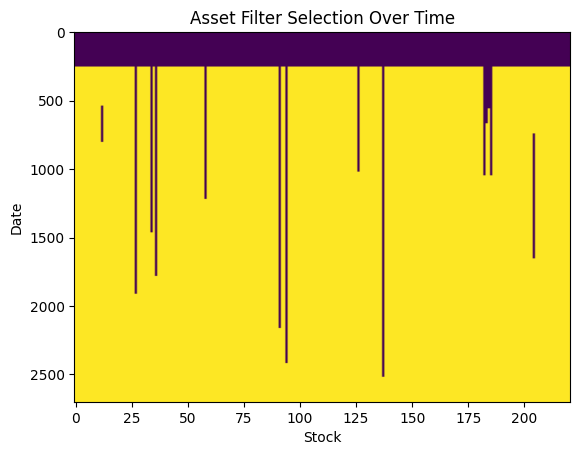

In [5]:
config = {
    'FILTER_MAX_ABS_RETURN': 0.5,
    'FORMATION_PERIOD': 252,
}

asset_filter = pd.DataFrame(index=prices.index, columns=tickers, data=False)

for date in prices.index[config['FORMATION_PERIOD']:]:
    selected_stocks, selected_rets, selected_uni = select_asset_universe(
        prices, 
        returns, 
        date, 
        config=config
    )
    asset_filter.loc[date, selected_stocks.columns] = True

plt.imshow(asset_filter, aspect='auto', cmap='viridis', interpolation=None)
plt.xlabel('Stock')
plt.ylabel('Date')
plt.title('Asset Filter Selection Over Time')
plt.grid(False)
plt.show()

Now let's check to make sure it works properly to avoid selecting stocks with large returns. We'll check the stocks from Question 1 with the largest absolute returns during the lookback period. Run the cell below to see the results.

You should not expect your filter to be perfect, but it should help avoid most of the time associated with the erroneous prices. In a real-world setting, we would want to use more advanced methods to filter out stocks that are not suitable for trading (as well as acquire good data, and avoid any lookahead bias). But for the purposes of the backtests we'll perform in this class, a filter like this suffices.

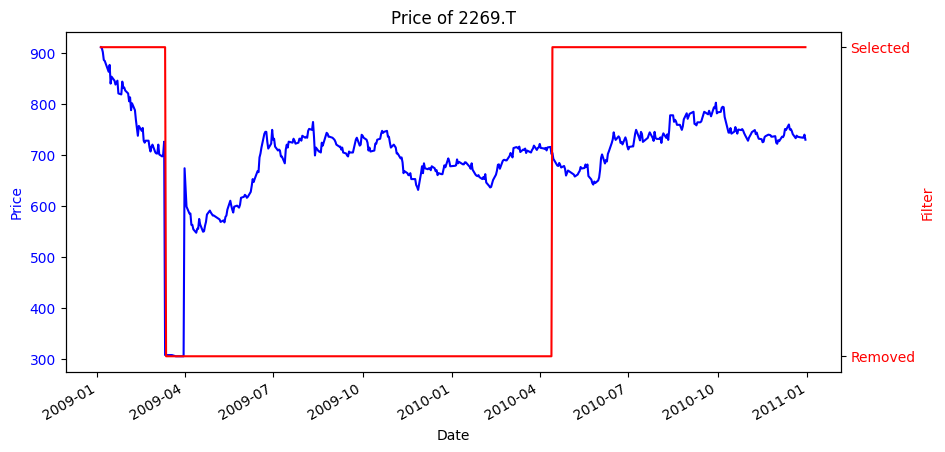

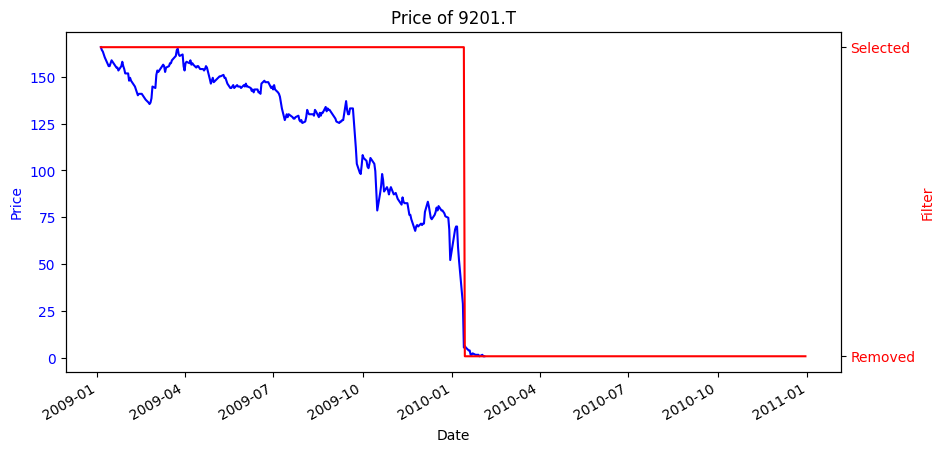

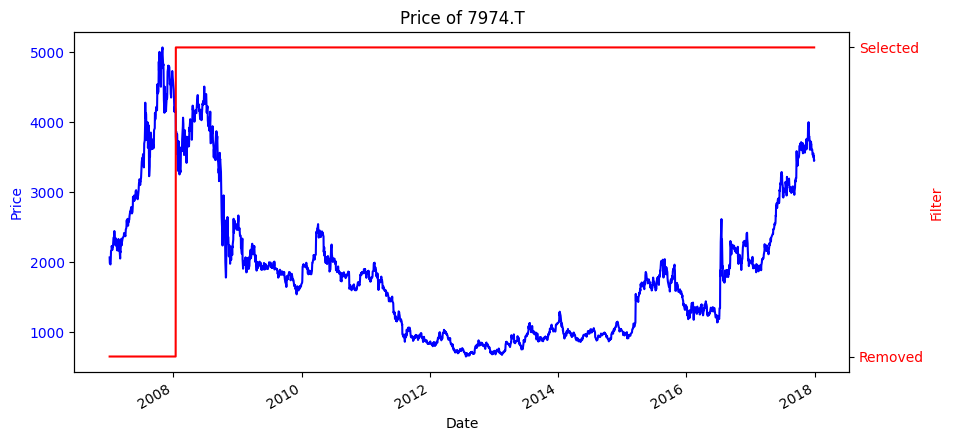

In [6]:
questionable_tickers = [
    ('2269.T', '2009', '2010'),
    ('9201.T', '2009', '2010'),
    ('7974.T', '2007', '2017'),
]

# plot price of each stock and filter status for each stock
for ticker, start, end in questionable_tickers:
    plt.figure(figsize=(10, 5))
    ax1 = plt.gca()
    prices[ticker][start:end].plot(label='Price', color='blue', ax=ax1)
    ax2 = ax1.twinx()
    (1 * asset_filter[ticker][start:end]).plot(label='Filter', color='red', ax=ax2)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Removed', 'Selected'])
    plt.title(f'Price of {ticker}')
    ax1.set_ylabel('Price', color='blue')
    ax2.set_ylabel('Filter', color='red')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.show()
    

# Question 3

(5 points)

Now we'll continue on with the implementation of the GGR pairs trading strategy. We need to write a function to compute the distances between the stocks from the GGR paper. Your function should do the following:

1. Take in a dictionary with the configuration parameter `NUM_PAIRS`, which is set to an integer such as 20. 
2. Normalize the price series of each stock to start at 1.
3. If the `config['DISTANCE_METRIC']` configuration parameter is set to `"ssd"`, compute the sum of squared differences (SSD) between the normalized price series of each pair of stocks. Otherwise throw an error.
4. Return a dataframe containing the top stock pairs and their corresponding distances.

Feel free to locate the relevant part of the paper if you need more details. 

For reference, the return of the `form_pairs` function should look something like this:
$$
\begin{array}{ccc}
\hline
\textbf{stock1} & \textbf{stock2} & \textbf{distance} \\
\hline
A & B & 0.12 \\
C & D & 0.23 \\
E & F & 0.40 \\
\hline
\end{array}
$$

For extra credit (0.5 points): in addition to the SSD metric, implement your own distance metric which is different from the SSD metric and produces a different ranking. Choose which metric to use based on the `DISTANCE_METRIC` configuration parameter of the `config` argument, which you can set to a string such as `"ssd"` or `"my_metric"`.

Our implementation is fairly naive and constitutes about 16 lines. You can do it in fewer or more lines.

Complete the function in `backtest.py` and paste the complete `form_pairs` function below:

In [7]:
# Your code here
def form_pairs(prices: pd.DataFrame, config: dict) -> pd.DataFrame:
    """
    Computes the distance between all pairs of stocks based on their normalized price series
    and returns information on the top `NUM_PAIRS` pairs with lowest distances.
    
    Parameters:
    -----------
    prices: pd.DataFrame
        Dataframe of stock prices with dates as index and tickers as columns
    config: dict
        Configuration parameters, containing the key `NUM_PAIRS`, with a value such as 20
        
    Returns:
    --------
    pd.DataFrame
        Dataframe with top `NUM_PAIRS` pairs sorted by distance
    """
    # Your code here
    num_pairs = int(config["NUM_PAIRS"])
    metric = str(config.get("DISTANCE_METRIC", "ssd")).lower()

    norm = prices.div(prices.iloc[0], axis=1)

    X = norm.to_numpy(dtype=float)          # (T, N)
    tickers = norm.columns.to_numpy()       # (N,)
    n = X.shape[1]

    # 2) Compute pairwise distance matrix
    if metric == "ssd":
        # dist(i,j) = sum_t (x_i(t) - x_j(t))^2
        s = np.sum(X * X, axis=0)           # (N,)
        gram = X.T @ X                      # (N, N)
        dist = s[:, None] + s[None, :] - 2.0 * gram  # (N, 1) + (1, N) - (N, N)
        dist = np.maximum(dist, 0.0)     

    elif metric == "corr_dist":
        # dist(i,j) = 1 - corr(x_i, x_j)
        C = np.corrcoef(X, rowvar=False)    # (N, N)
        dist = 1.0 - C
        dist = np.nan_to_num(dist, nan=np.inf)  # handle NaN corr

    else:
        raise ValueError(f"Unsupported DISTANCE_METRIC: {metric}")

    # 3) Extract upper triangle (unique pairs) and pick top K
    iu = np.triu_indices(n, k=1)
    d = dist[iu]
    order = np.argsort(d)[:num_pairs]

    return (
        pd.DataFrame(
            {
                "stock1": tickers[iu[0][order]],
                "stock2": tickers[iu[1][order]],
                "distance": d[order],
            }
        )
        .sort_values("distance", ascending=True, ignore_index=True)
    )
    # e.g. return pairs_df

Now, let's test it. Make sure your `form_pairs` function is working correctly by running the code below. We'll compute 5 pairs as a demo. This cell plots the top pair's prices over the lookback window. The prices should look pretty close and cross fairly frequently. 

,stock1,stock2,distance
0,9502.T,9503.T,0.0516
1,9531.T,9532.T,0.1141
2,9503.T,9532.T,0.1636
3,9021.T,9531.T,0.1701
4,9502.T,9532.T,0.1726


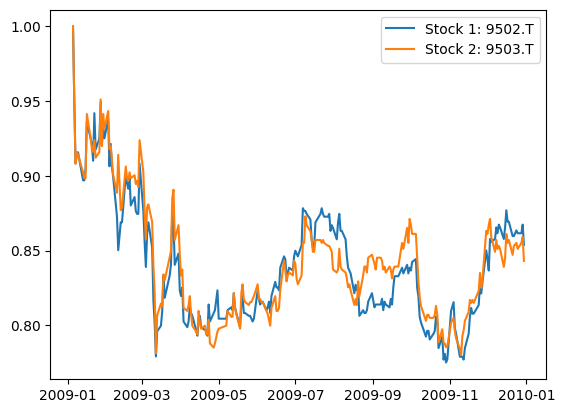

In [8]:
# Set a date for the asset filter
date = pd.Timestamp('2010-01-04')
config = {
    'FILTER_MAX_ABS_RETURN': 0.5,
    'FORMATION_PERIOD': 252,
    'NUM_PAIRS': 5,
    'DISTANCE_METRIC': 'ssd',
}

# Filter assets
filtered_prices, filtered_returns, valid_stocks = select_asset_universe(
    prices, returns, date, config=config
)

# Compute distances
pairs = form_pairs(filtered_prices, config)
display(pairs)

# Plot the top pair's normalized prices over the (approximate) lookback window
ticker1 = pairs.loc[0, 'stock1']
ticker2 = pairs.loc[0, 'stock2']

s1 = filtered_prices[date - pd.Timedelta(days=365):date][ticker1]
s2 = filtered_prices[date - pd.Timedelta(days=365):date][ticker2]
s1 = s1 / s1.iloc[0]
s2 = s2 / s2.iloc[0]
plt.plot(s1, label=f'Stock 1: {ticker1}')
plt.plot(s2, label=f'Stock 2: {ticker2}')
plt.legend()
plt.show()

# Question 4

(6 points)

Now we have the ability to create pairs. However, we'll want to do some calculation of hedge ratios and cointegration tests to make sure the pairs are actually cointegrated. Cointegration is not covered in Gatev et al., but may (or may not!) improve the strategy. In any case, we'll apply it here as a filter.

We've written a function called `estimate_hedge_ratio` in `backtest.py`. We'll use that function to estimate the hedge ratios, or *betas*, of the pairs. We'd like you to complete it. Do the following:

1. Go through the `pairs` dataframe and for each pair, extract the price series for the two stocks.
2. Use a method to compute the hedge ratio between the two stocks. If `config['HEDGE_RATIO_METHOD'] == 'ols'`, use OLS regression with no intercept to compute the hedge ratio by regressing stock 2 on stock 1. If `config['HEDGE_RATIO_METHOD'] == 'unit'`, set the hedge ratio to 1. Otherwise, throw an error.
3. Use the hedge ratio to compute the spread $s_t = p_2(t) - \beta p_1(t)$. Store the $\beta$'s.
4. Perform an ADF test on the spread (the `arch.unitroot` package is useful).
5. Store stock1, stock2, the hedge ratio, the distance, the ADF statistic, the ADF p-value, whether the pair is cointegrated at the `config['COINT_THRESHOLD']` significance level in the results dataframe.
6. Filter the results dataframe to only include pairs with an ADF p-value less than or equal to the threshold.
7. Return the results dataframe.

For reference, the return of the `estimate_hedge_ratio` function may look something like this:

$$
\begin{array}{ccccccc}
\hline
\textbf{stock1} & \textbf{stock2} & \textbf{hedge\_ratio} & \textbf{distance} & \textbf{adf\_stat} & \textbf{adf\_pvalue} & \textbf{is\_cointegrated}\\
\hline
A & B & 1.00 & 0.12 & -3.56 & 0.01 & True \\
C & D & 1.00 & 0.23 & -3.14 & 0.02 & True \\
E & F & 1.00 & 0.40 & -2.26 & 0.04 & True \\
E & G & 1.00 & 0.56 & -2.75 & 0.03 & True \\
\hline
\end{array}
$$


For extra credit (0.5 points): in addition to the OLS and unit hedge ratio methods, implement your method for computing a hedge ratio, which is different from OLS and produces different values. Don't just choose a single integer, such as 2. Then, in your code, choose which regression method to use based on the `HEDGE_RATIO_METHOD` configuration parameter of the `config` argument, which you can set to a string such as `"ols"`, `"unit"`, or `"my_method"` (please choose a more descriptive name than "my_method").

Our implementation is fairly naive and constitutes about 20 lines. You can do it in fewer or more lines.

Complete the function in `backtest.py` and paste your complete `estimate_hedge_ratio` function below:

In [9]:
def estimate_hedge_ratio(prices: pd.DataFrame, pairs: pd.DataFrame, config: dict) -> pd.DataFrame:
    """
    Estimates the betas and cointegrating relationships between the top K pairs and returns this information.
    """
    import arch.unitroot

    method = str(config.get("HEDGE_RATIO_METHOD", "ols")).lower()
    threshold = float(config["COINT_THRESHOLD"])

    output_rows = []

    for r in pairs.itertuples(index=False):
        stock1 = r.stock1
        stock2 = r.stock2
        distance = float(r.distance)

        df = prices[[stock1, stock2]].dropna()
        p1 = df[stock1].to_numpy(dtype=float)
        p2 = df[stock2].to_numpy(dtype=float)

        if method == "ols":
            # No-intercept OLS has beta = (p1·p2)/(p1·p1) from mathematical derivation
            denom = float(np.dot(p1, p1))
            if denom == 0.0:
                continue
            beta = float(np.dot(p1, p2) / denom)
        elif method == "unit":
            beta = 1.0
        elif method == "median_ratio":  # extra credit
            # price ratio beta ≈ median(p2/p1), less sensitive to outliers than OLS
            ratio = p2 / p1
            ratio = ratio[np.isfinite(ratio)]
            if ratio.size == 0:
                continue
            beta = float(np.median(ratio))
        else:
            raise ValueError(f"Unsupported HEDGE_RATIO_METHOD: {method}")

        spread = pd.Series(p2 - beta * p1, index=df.index)

        try:
            adf = arch.unitroot.ADF(spread)
            adf_stat = float(adf.stat)
            adf_pvalue = float(adf.pvalue)
        except Exception:
            adf_stat = np.nan
            adf_pvalue = np.nan

        is_cointegrated = bool(np.isfinite(adf_pvalue) and adf_pvalue <= threshold)

        output_rows.append(
            {
                "stock1": stock1,
                "stock2": stock2,
                "hedge_ratio": beta,
                "distance": distance,
                "adf_stat": adf_stat,
                "adf_pvalue": adf_pvalue,
                "is_cointegrated": is_cointegrated,
            }
        )

    results = pd.DataFrame(output_rows)
    if results.empty:
        return results

    return results[results["adf_pvalue"] <= threshold].copy()

Now we'll test your implementation. Run the cell below. The spread you observe should appear to be mostly oscillating around its mean value.

,stock1,stock2,hedge_ratio,distance,adf_stat,adf_pvalue,is_cointegrated
0,9502.T,9503.T,1.0,0.0516,-3.5541,0.0067,True
2,9503.T,9532.T,1.0,0.1636,-4.0107,0.0014,True
3,9021.T,9531.T,1.0,0.1701,-3.1722,0.0217,True
4,9502.T,9532.T,1.0,0.1726,-2.9486,0.0400,True


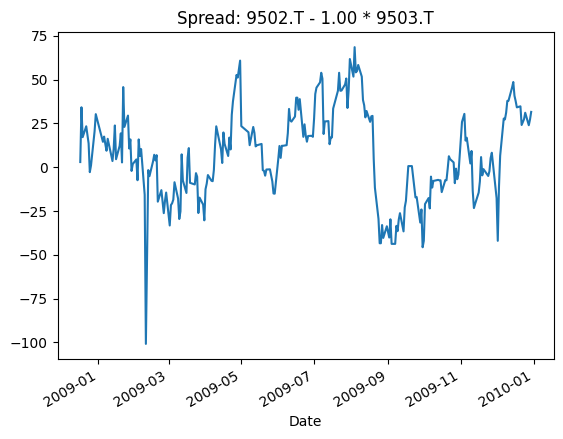

In [10]:
# Take the pairs you created above and prices and returns and
# pass them to the `estimate_hedge_ratio` function.

config = {
    'DISTANCE_METRIC': 'ssd',
    'HEDGE_RATIO_METHOD': 'unit',
    'COINT_THRESHOLD': 0.05,
}

# Estimate hedge ratios
hedge_ratios = estimate_hedge_ratio(filtered_prices, pairs, config)
display(hedge_ratios)

# Plot the first hedge ratio as a spread
pair_idx = 0

ticker1 = hedge_ratios['stock1'].iloc[pair_idx]
ticker2 = hedge_ratios['stock2'].iloc[pair_idx]
hr = hedge_ratios['hedge_ratio'].iloc[pair_idx]
s1 = filtered_prices[ticker1]
s2 = filtered_prices[ticker2]
spread = s1 - hr * s2
spread.plot()
plt.title(f'Spread: {ticker1} - {hr:.2f} * {ticker2}')
plt.show()

# Question 5

(8 points)

Now that we have identified cointegrated pairs and estimated their hedge ratios, we need to generate trading signals based on the divergence and convergence of these pairs. This is a critical component of the Gatev et al. pairs trading strategy.

We've created a function called `compute_signal` in `backtest.py`. Your task is to implement this function according to the Gatev et al. methodology. Complete the following steps:

1. Loop through each pair in the `hedge_ratios` dataframe.

2. Extract the price series for both stocks in each pair from the `prices` dataframe.

3. Calculate the spread between the two stocks using the hedge ratio. The spread should be calculated as: `spread = price2 - hedge_ratio * price1`

4. Implement a rolling window calculation to standardize the spread:
   - Calculate the rolling mean of the spread using a window size of `config['ESTIMATION_PERIOD']`
   - Calculate the rolling standard deviation using the same window size
   - Compute the z-score: `z_score = (spread - rolling_mean) / rolling_std`

5. Initialize an empty signal dataframe for the pair.

6. Loop through time for the pair, generating trading signals based on the z-score and price convergence:
   - **Entry Conditions**:
     - If z-score < -`config['Z_THRESHOLD']`, enter a long spread position (signal = 1)
     - If z-score > `config['Z_THRESHOLD']`, enter a short spread position (signal = -1)
   
   - **Exit Conditions**:
     - According to Gatev et al., positions should be closed when the normalized prices cross (converge)
     - You need to track which normalized price was higher/lower at trade entry
     - Close the position (signal = 0) when the normalized prices cross back over each other

7. For each pair, store the following in the signals dictionary:
   - stock1 and stock2 identifiers
   - hedge_ratio
   - signal series
   - z_score series
   - any additional metadata you find useful e.g. for debugging, such as series for the spread, crosses, mean, volatility, etc.

8. Return the completed signals dictionary.

## Important Implementation Details

- You must properly track the state of each trade (whether you're in a trade or not)
- You need to record which normalized price was higher/lower at trade entry to determine when price convergence occurs
- The signals should be a time series with the same index as the price data
- For each date, the signal should be:
  - 1: Long spread (short stock1, long stock2)
  - -1: Short spread (long stock1, short stock2)
  - 0: No position

## Example Output

The returned dictionary should have keys for each pair and values containing the signal information:

```python
{
    'STOCK1_STOCK2': {
        'stock1': 'STOCK1',
        'stock2': 'STOCK2',
        'hedge_ratio': 1.25,
        'signal': pd.Series(
            data=[0, 0, 1, 1, 0, -1, -1, 0, ...],
            index=pd.DatetimeIndex([
                '2009-01-01', '2009-01-02', '2009-01-03',
                '2009-01-04', '2009-01-05', '2009-01-08',
                '2009-01-09', '2009-01-10', ...
            ])
        ),

        'z_score': pd.Series(
            data=[0.5, 1.8, 2.2, 1.9, 0.8, -1.2, -2.1, -1.8, ...],
            index=pd.DatetimeIndex([
                '2009-01-01', '2009-01-02', '2009-01-03',
                '2009-01-04', '2009-01-05', '2009-01-08',
                '2009-01-09', '2009-01-10', ...
            ])
        ),
        # Add any additional metadata you find useful
    },
    # Additional pairs...
}
```

<!-- For extra credit (1 points): Implement an alternative exit strategy in addition to the price convergence method from Gatev et al. Add a configuration parameter `EXIT_STRATEGY` that allows switching between:

- "convergence" - Exit when prices cross (default, as in Gatev et al.)
- "z_score" - Exit when the z-score returns to zero (or within a small threshold) -->

<!-- Don't do this extra credit above, it's commented out ;) -->

Our implementation is about 55 lines, but this can be done in more or fewer lines.

Complete the function in `backtest.py` and paste the complete `compute_signal` function below:

In [ ]:
# Your code here

Now we'll test your implementation. Run the cell below.

In [ ]:
# Take the pairs you created above and prices and returns and
# pass them to the `estimate_hedge_ratio` function.

config = {
    'Z_THRESHOLD': 2,
    'ESTIMATION_PERIOD': 20,
    'EXIT_STRATEGY': 'convergence',
}

# Compute signals
signals = compute_signal(filtered_prices, hedge_ratios, config)
pair_idx = 0

# Get ticker info for the selected pair
ticker1 = hedge_ratios['stock1'].iloc[pair_idx]
ticker2 = hedge_ratios['stock2'].iloc[pair_idx]
hr = hedge_ratios['hedge_ratio'].iloc[pair_idx]

# Create figure with two subplots sharing x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot normalized prices on first subplot
s1 = filtered_prices[ticker1]
s2 = filtered_prices[ticker2]
s1_norm = s1 / s1.iloc[0]
s2_norm = s2 / s2.iloc[0]
ax1.plot(s1_norm.index, s1_norm, label=ticker1)
ax1.plot(s2_norm.index, s2_norm, label=ticker2)
ax1.set_title('Normalized Price')
ax1.legend()

# Plot spread and signals on second subplot
spread = s1 - hr * s2
ax2.plot(spread.index, spread, label='Spread')

# Add signals to the second subplot
pair_signals = signals[f"{ticker1}_{ticker2}"]
entry_long = np.where(pair_signals['signal'] == -1)[0]
entry_short = np.where(pair_signals['signal'] == 1)[0]
exit_points = np.where(pair_signals['signal'] == 0)[0]

ax2.scatter(spread.index[entry_long], spread.iloc[entry_long], 
            color='green', marker='^', s=100, label='Long Position')
ax2.scatter(spread.index[entry_short], spread.iloc[entry_short], 
            color='red', marker='v', s=100, label='Short Position')
ax2.scatter(spread.index[exit_points], spread.iloc[exit_points], 
            color='black', marker='o', s=50, label='Flat Position')
ax2.set_title(f'Spread and Signals: {ticker1} - {hr:.2f} * {ticker2}')
ax2.legend()

plt.tight_layout()
plt.show()

# Question 6

(8 points)

Last step of the implementation! Now we're going to convert our set of signals for each pair into positions using the `allocate_positions` function. This function will take a set of signals for each pair and allocate the available capital to each pair based on the signals for the given date. The function will then return a set of positions for each stock for the given date. We definitely don't claim this to be the best way to allocate among the pairs, but it's a simple baseline. 

Let's get into it:

1. Initialize an empty dictionary to store positions for each stock.

2. Add a few checks to handle edge cases:
   - If the current date is not in the price data, return empty positions
   - If portfolio cash is None or zero/negative, return empty positions

3. Collect active pairs for the current date:
   - Iterate through the signals dictionary
   - For each pair, extract stock1, stock2, and the hedge ratio
   - Skip pairs where we don't have price data for both stocks
   - Get the signal with a one-day lag (yesterday's signal for today's execution)
   - Skip signals that aren't for the current date or are zero/NaN
   - Store active pairs with their relevant information (stocks, hedge ratio, signal value, current prices)

4. If no active pairs are found, return empty positions.

5. Allocate capital equally across all active pairs:
   - Calculate `capital_per_pair = (portfolio_cash * config['MAX_LEVERAGE']) / number of active pairs`

6. For each active pair:
   - Initialize positions for both stocks if they don't exist in the positions dictionary
   - Calculate balanced position sizes using a notional ratio approach:
     - `notional_ratio = (hedge_ratio * price2) / price1`
     - `shares1 = capital_per_pair / (price1 * (1 + notional_ratio))`
     - `shares2 = shares1 * hedge_ratio`
   - Update positions based on signal:
     - `positions[stock1] += -signal_value * shares1`
     - `positions[stock2] += signal_value * shares2`

7. Return the positions dictionary.

The `allocate_positions` function takes the following parameters:

- `signals`: A dictionary with signal information for each pair. Note that this contains signals for the entire trading period, not just the current date. Make sure to avoid using signals from the future!
- `config`: Configuration parameters, containing MAX_LEVERAGE
- `prices`: DataFrame with stock prices for the entire trading period (dates as index, tickers as columns)
- `date`: Current date for price and signal reference
- `portfolio_cash`: Available cash in the portfolio

It returns a dictionary mapping stock names to position sizes (number of shares).

Our implementation is fairly naive and requires about 40 lines of code. You can implement it in fewer or more lines.

Complete the function in `backtest.py` and paste the complete `allocate_positions` function below:

In [ ]:
# Your code here

Now, we'll test your implementation. Run the following cell and observe the positions. They should appear to follow most of the signals, more or less. Recall that any single stock may be involved in multiple pairs, and so the positions you observe here may not be perfectly correlated with the signals, and may not be perfectly offset at all times. This is expected behavior.

In [ ]:
config = {
    'MAX_LEVERAGE': 0.05,
}

pair_idx = 0

# Get ticker info for the selected pair
ticker1 = hedge_ratios['stock1'].iloc[pair_idx]
ticker2 = hedge_ratios['stock2'].iloc[pair_idx]
hr = hedge_ratios['hedge_ratio'].iloc[pair_idx]

# Compute the positions using allocate_positions
positions_t1 = {}
positions_t2 = {}
for date in filtered_prices.index:
    positions_t1[date] = allocate_positions(
        signals, config, filtered_prices, pd.Timestamp(date), 1_000_000
    ).get(ticker1, 0)
    positions_t2[date] = allocate_positions(
        signals, config, filtered_prices, pd.Timestamp(date), 1_000_000
    ).get(ticker2, 0)

positions = pd.DataFrame(
    {ticker1: positions_t1.values(), ticker2: positions_t2.values()},
    index=filtered_prices.index,
)
display(positions)

# Create figure with three subplots sharing x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot normalized prices on first subplot
s1 = filtered_prices[ticker1]
s2 = filtered_prices[ticker2]
s1_norm = s1 / s1.iloc[0]
s2_norm = s2 / s2.iloc[0]
ax1.plot(s1_norm.index, s1_norm, label=ticker1)
ax1.plot(s2_norm.index, s2_norm, label=ticker2)
ax1.set_title('Normalized Price')
ax1.legend()

# Plot spread and signals on second subplot
spread = s1 - hr * s2
ax2.plot(spread.index, spread, label='Spread')

# Add signals to the second subplot
pair_signals = signals[f"{ticker1}_{ticker2}"]
entry_long = np.where(pair_signals['signal'] == -1)[0]
entry_short = np.where(pair_signals['signal'] == 1)[0]
exit_points = np.where(pair_signals['signal'] == 0)[0]

ax2.scatter(spread.index[entry_long], spread.iloc[entry_long], 
            color='green', marker='^', s=100, label='Long Position')
ax2.scatter(spread.index[entry_short], spread.iloc[entry_short], 
            color='red', marker='v', s=100, label='Short Position')
ax2.scatter(spread.index[exit_points], spread.iloc[exit_points], 
            color='black', marker='o', s=50, label='Flat Position')
ax2.set_title(f'Spread and Signals: {ticker1} - {hr:.2f} * {ticker2}')
ax2.legend()

# Now plot the positions on the third subplot
ax3.plot(positions.index, positions[ticker1], label=ticker1)
ax3.plot(positions.index, positions[ticker2], label=ticker2)
ax3.set_title('Positions (Number of Shares)')
ax3.legend()

plt.tight_layout()
plt.show()


# Question 7

(1 point)

Finally, we'll run a backtest. Run the cell below to see the results of the strategy. It should take about 3 minutes. Note that the results will be written to disk after the backtest is complete, so if you run it again with the same `config` settings, it will load the data and produce a performance analysis in just a few seconds. If you want the backtest to re-run instead of load data, make sure to delete the `results` directory it will create.

Don't be surprised if the results are poor--this basic style of pairs trading does not typically yield significant returns or high Sharpe ratios anymore. However, we've still learned a lot from it, and (significant) variations of pairs trading are still used in industry. The intuition behind the strategy is still sound. Particular implementations of the idea (such as those widely publicized in academic papers), however, will often lose efficacy over time as other market participants "trade away" the particular signals, aka edge, that the strategy exploits. This is known as *alpha decay*.

More importantly, don't rush into conclusions about the performance of the strategy if it looks good to you. This is a slightly short backtest over a set of equities which was selected in a way that is affected by lookback bias (recall from HW1 that we only selected stocks which were in existence in one particular year of the Nikkei 225). We've also neglected to model a few important things, such as the price impact and bid-ask spread. And most importantly, we've made a dangerously optimistic assumption: that we have the ability to short all of these assets at any time. Japan has several restrictions on shorting, and a broker may either prevent you from borrowing some of these assets, or may *recall* your borrowed asset (perhaps in the middle of a trade!) if the owner wants to sell it. This is a very significant issue, and can turn a profitable-looking strategy into a losing one in reality. Because we don't have historical data on Japanese shorting restrictions (or proxies for it which Gatev et al. 2006 use, such as volume), we've neglected to model this risk in this assignment. For these reasons, it's likely that today, any positive alpha from this strategy is substantially smaller than it appears to be, and probably negligible--or even negative.

All that aside, take a look at the results and briefly comment on what you observe in the test below.  Try to explore or explain why the strategy has performed the way it has. This is an open-ended question, and there is no right answer.

In [ ]:
(prices, returns, tickers, metadata, portfolio_history, metrics_df, pairs_df) = run_backtest()

# Question 8 (extra credit)

(extra credit: 1-5 points)

As a relatively new class, we're still developing some of the assignments, and like anyone, we're fallible. If you find a bug in the code, please report it to us, and we'll fix it. For doing so, we'll award you extra credit which scales linearly with the severity of the bug(s). Please describe your bug(s) below.

**Your answer here**

# Question 9 (ungraded)

(ungraded)

Here, feel free to experiment with different settings for the configuration dictionary or on the data and report any interesting results you discover. We won't grade this, but we will read it. Feel free to add any additional functionality to `backtest.py` to help you with your experiments. If you modify one of the functions pasted in a prior question, please leave the original code in that cell.

If you're still interested in exploring, here are several ideas for improvement:

1. To make this course more accessible, this backtester uses vanilla Python code (including Python loops), pandas dataframes, and Python objects. Even worse, it loops over Pandas dataframes, which is very inefficient. It would be a lot faster if we made more efficient choices, such as using NumPy arrays, taking advantage of vectorized functions, or using Cython. Try timing or profiling the `run_backtest` function and see where the bottlenecks are in the code. Then implement these more efficient methods for the one function where the most time is spent. How much does it speed up your code?
2. This backtester is written in a way which iterates over pairs formation periods and trading periods. This makes it easy to carve out functions for implementation, but it's not very realistic or extensible to other types of strategies. Moreover, it doesn't exactly correspond to the method of Gatev et al. 2006, which runs six separate portfolios, each of which has its own formation period and trading period, which are offset by one month. In this implementation, we only form new pairs every six months. Try changing the backtester to instead iterate over days, and form new pairs at the beginning or end of every month. 
3. The `allocate_positions` function we propose is quite naive. Try to implement a smarter `allocate_positions` function which allocates capital more efficiently and controls risk a more carefully when there's a smaller number of pairs to trade. Similarly, you might want to increase risk when there's a larger number of pairs to trade--or not.
4. The return calculation is based on the entire amount of initial capital, even though under some position formation policies, such as ours, all of it may not be used at all times. Try implementing two return calculations: one which is based on committed capital, and another which is based on committed and allocated capital, as done in the Gatev et al. 2006 paper. If you're really ambitious, you could go even further and implement margin requirements, leverage limits, and margin calls. Then add a configuration option to enable or disable them to see how they affect the results.
5. There are some other robustness tests and metrics which we could add, from both the Gatev et al. 2006 paper and the broader literature. Try adding some of them. Comparing to a benchmark, computing more information about drawdowns, computing tables of the average, best, and worst returns, days, weeks, and months, and more would be welcome. Check out the quantstats package for ideas.